# Face tracking pipeline

The following example illustrates how to use the `facenet_pytorch` python package to perform face detection and tracking on an image dataset using MTCNN.

In [4]:
torch.zeros(1).cuda()

tensor([0.], device='cuda:0')

In [2]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

E:\huzi works\FYP\GuardianWatch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Determine if an nvidia GPU is available

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
print('Running on device: {}'.format(device))

Running on device: cuda:0


#### Define MTCNN module

Note that, since MTCNN is a collection of neural nets and other code, the device must be passed in the following way to enable copying of objects when needed internally.

See `help(MTCNN)` for more details.

In [6]:
mtcnn = MTCNN(keep_all=True, device=device)

#### Get a sample video

We begin by loading a video with some faces in it. The `mmcv` PyPI package by mmlabs is used to read the video frames (it can be installed with `pip install mmcv`). Frames are then converted to PIL images.

In [7]:
vname = 'test2.0Ch12 20240311121534.mp4'
video = mmcv.VideoReader(vname)
#frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video(vname, width=640)

In [20]:
help(MTCNN)

Help on class MTCNN in module facenet_pytorch.models.mtcnn:

class MTCNN(torch.nn.modules.module.Module)
 |  MTCNN(image_size=160, margin=0, min_face_size=20, thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True, select_largest=True, selection_method=None, keep_all=False, device=None)
 |  
 |  MTCNN face detection module.
 |  
 |  This class loads pretrained P-, R-, and O-nets and returns images cropped to include the face
 |  only, given raw input images of one of the following types:
 |      - PIL image or list of PIL images
 |      - numpy.ndarray (uint8) representing either a single image (3D) or a batch of images (4D).
 |  Cropped faces can optionally be saved to file
 |  also.
 |  
 |  Keyword Arguments:
 |      image_size {int} -- Output image size in pixels. The image will be square. (default: {160})
 |      margin {int} -- Margin to add to bounding box, in terms of pixels in the final image. 
 |          Note that the application of the margin differs slightly from the 

#### Run video through MTCNN

We iterate through each frame, detect faces, and draw their bounding boxes on the video frames.

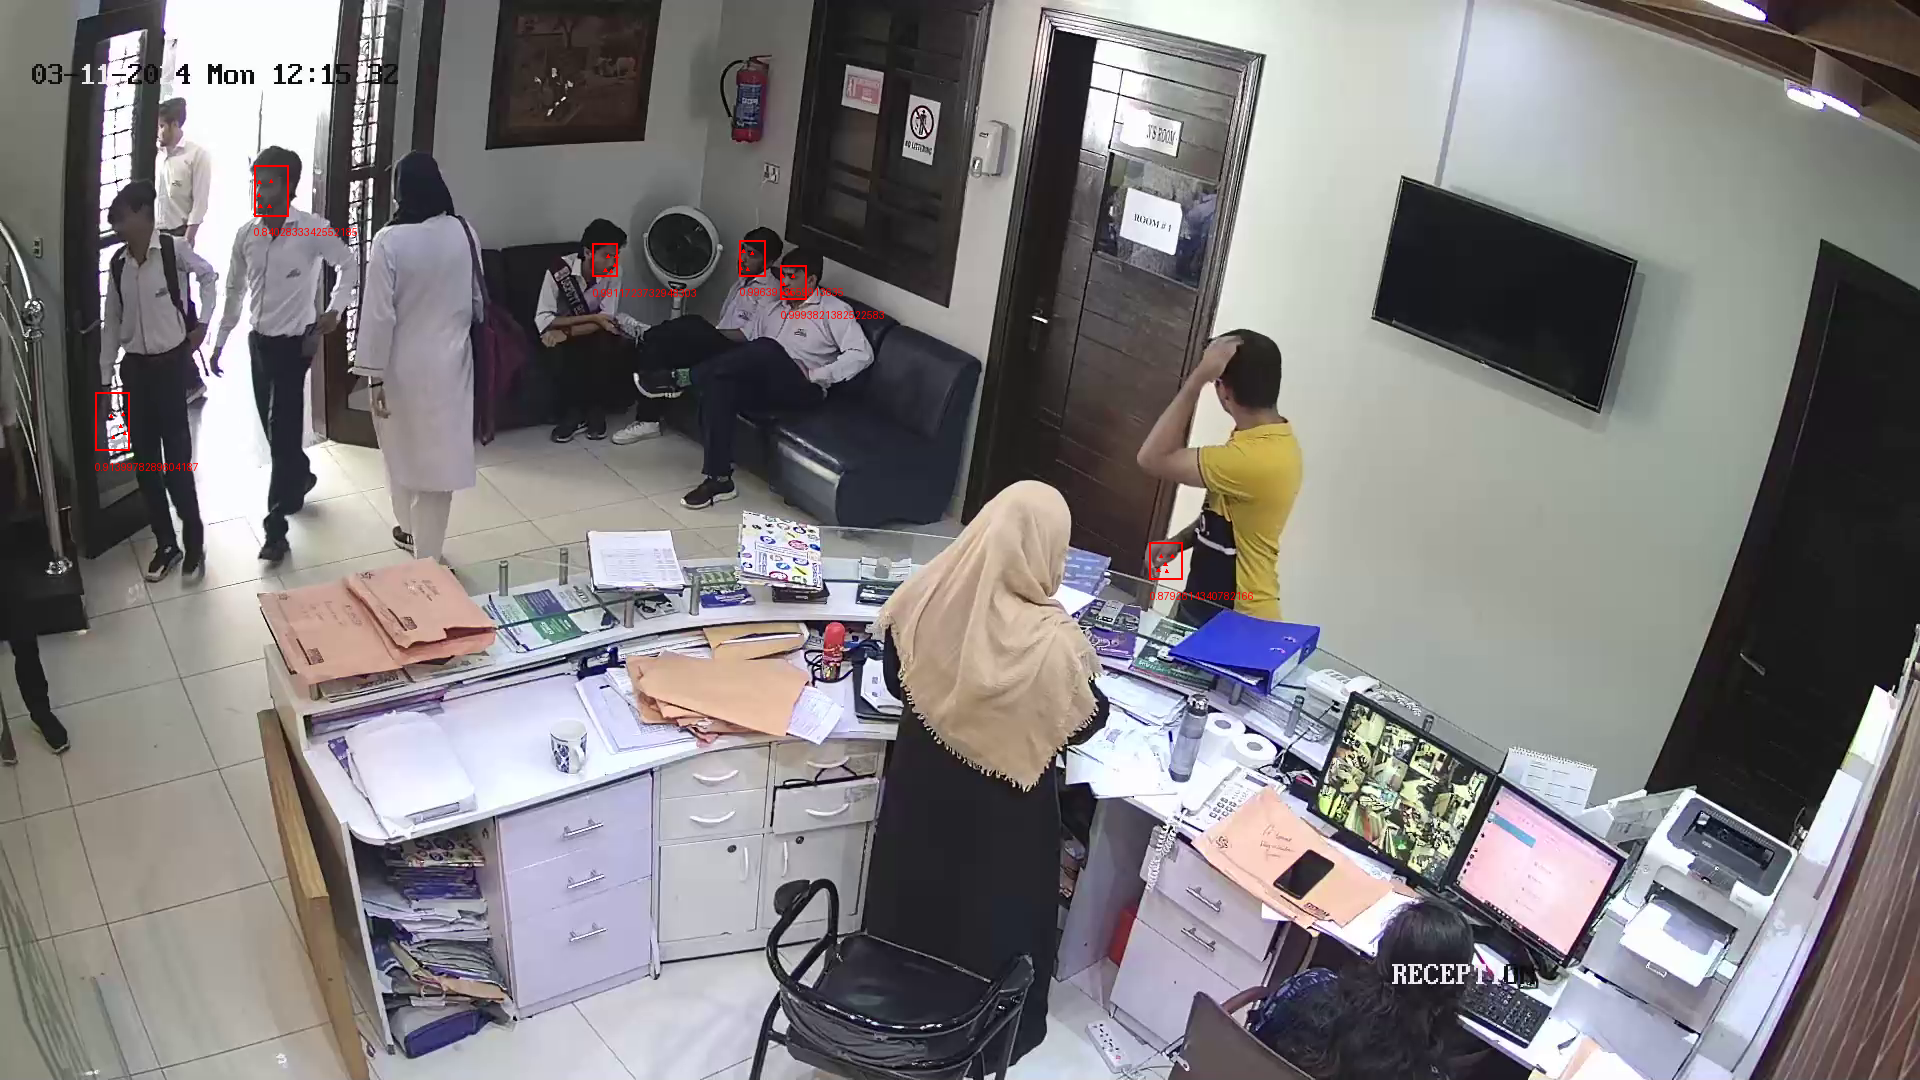

boxes [[95.4654541015625, 392.20916748046875, 129.3291473388672, 450.5733947753906], [254.40147399902344, 165.39527893066406, 288.344482421875, 216.04232788085938], [1149.9891357421875, 542.6895141601562, 1182.2564697265625, 579.6387939453125], [739.7974243164062, 240.13499450683594, 765.63916015625, 276.09246826171875], [780.875244140625, 265.9833068847656, 806.3793334960938, 299.5037536621094], [592.5748901367188, 243.10435485839844, 617.8385620117188, 276.5825500488281]]
probs [0.9139978289604187, 0.8402833342552185, 0.8792614340782166, 0.9963913559913635, 0.9993821382522583, 0.9911723732948303]
Landmark [[[111.01783752441406, 416.9475402832031], [123.25090026855469, 414.0476989746094], [120.75546264648438, 426.98687744140625], [113.077880859375, 437.44256591796875], [124.72872924804688, 433.7628479003906]], [[259.3026428222656, 182.0642547607422], [271.1077880859375, 181.825439453125], [259.1608581542969, 195.3240509033203], [260.6352844238281, 206.29693603515625], [269.29464721679

In [13]:
frame = video[1]
frame = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
boxes, probs , landmarks  = mtcnn.detect(frame, landmarks=True)
d = display.display(frame, display_id=True)
    # Draw faces
    #frame_draw = frame.copy()
draw = ImageDraw.Draw(frame)
print("boxes", boxes.tolist())
print("probs", probs.tolist())
print("Landmark", landmarks.tolist())

for p, box, l in zip(probs, boxes, landmarks):
    print("box")
    print(box.tolist())
    print("prob")
    print(p)
    print("landmark")
    print(l.tolist())
    
    
    draw.rectangle(box.tolist(), outline=(255, 0, 0), width=2)
    draw.text((box.tolist()[0],box.tolist()[3]+10), str(p), font = None, align ="left",fill = "red") 
    for ls in l:
        draw.regular_polygon((ls.tolist(),2), 3, rotation=0, fill=(255, 0, 0, 255), outline=None, width=1)
        
    

d.update(frame)

Tracking frame: 1

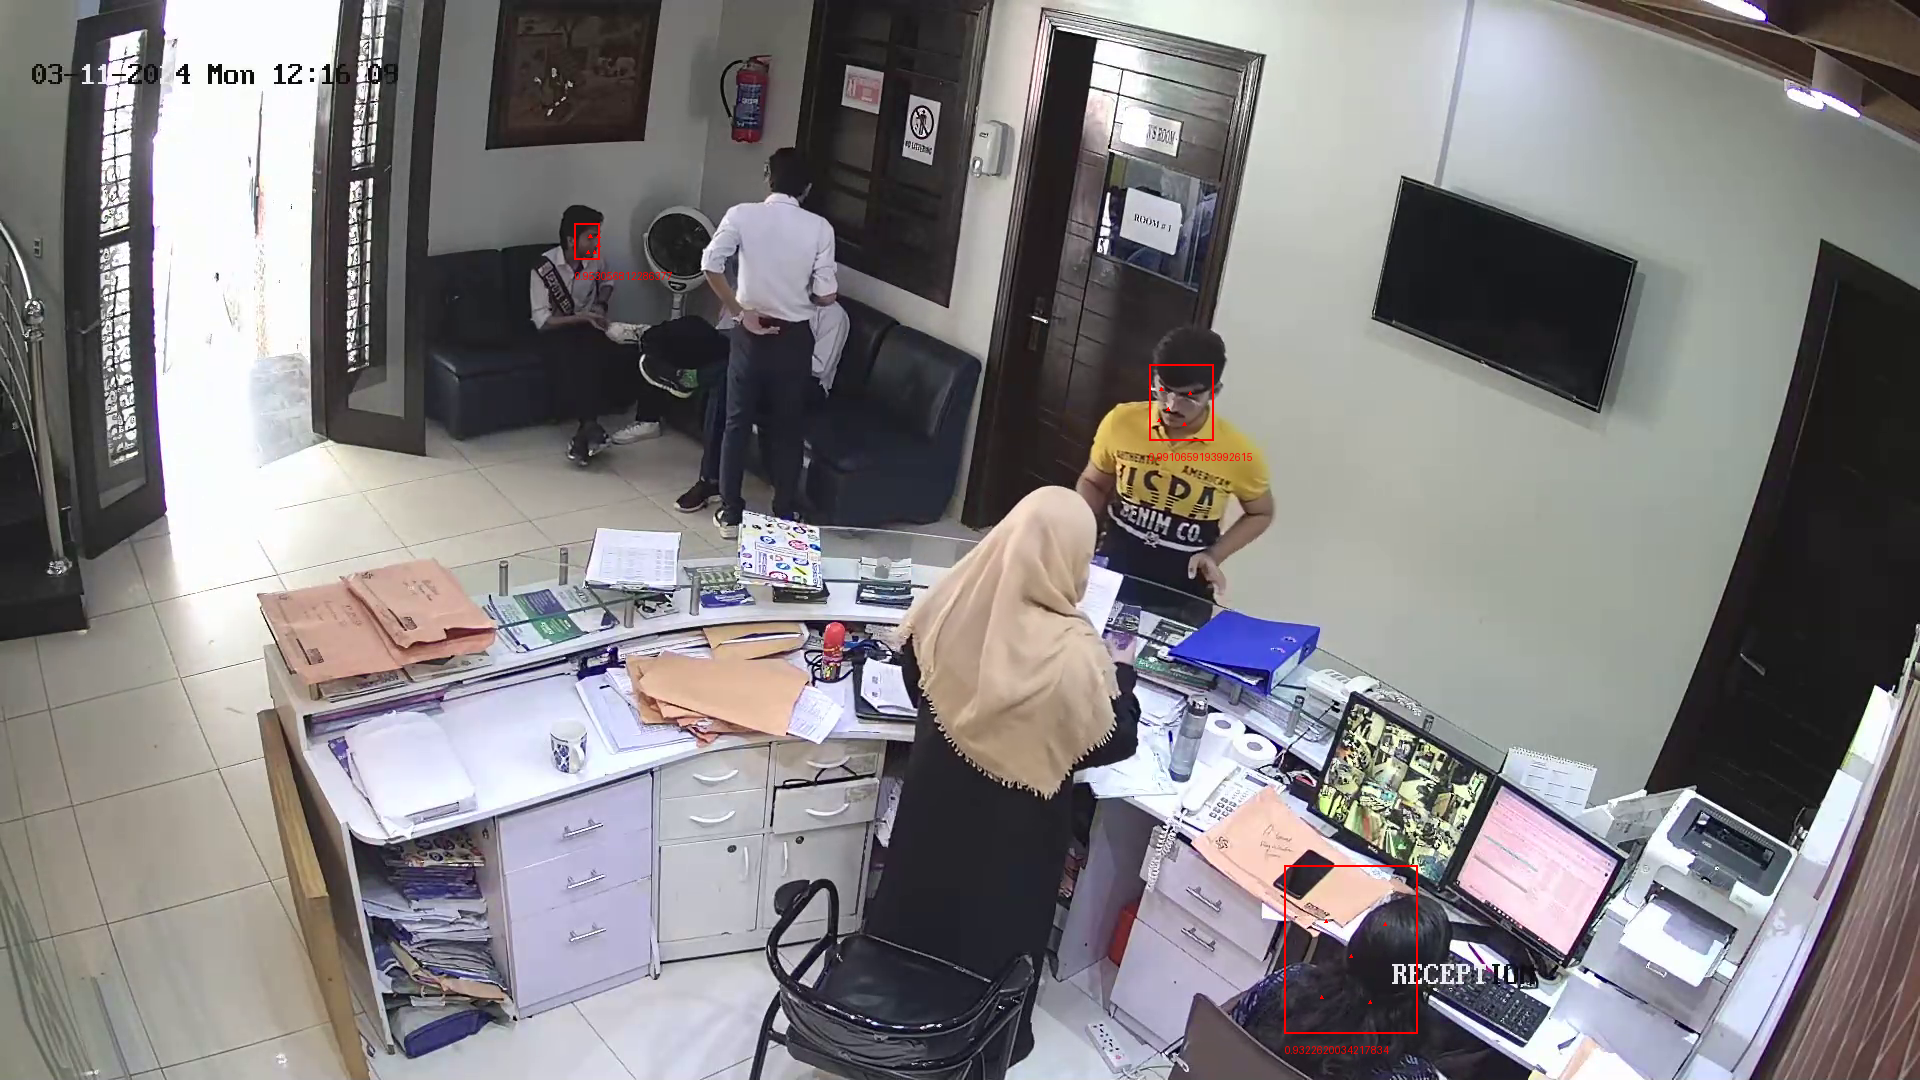

Tracking frame: 922

In [ ]:
frames_tracked = []
for i, frame in enumerate(video):
    frame = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    print('\rTracking frame: {}'.format(i + 1), end='')
    
       
    # Detect faces
    boxes, probs , landmarks  = mtcnn.detect(frame, landmarks=True)

    
    # Draw faces
    #frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame)
    if boxes is not None:
        for p, box, l in zip(probs, boxes, landmarks):
            #print(box, p, l)

            draw.rectangle(box.tolist(), outline=(255, 0, 0), width=2)
            draw.text((box.tolist()[0],box.tolist()[3]+10), str(p), font = None, align ="left",fill = "red") 
            for ls in l:
                draw.regular_polygon((ls.tolist(),2), 3, rotation=0, fill=(255, 0, 0, 255), outline=None, width=1)

    #mine
    
    if i ==0:
        d = display.display(frame, display_id=True)
        #dim = frame_draw.size
        #fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
        #video_tracked = cv2.VideoWriter('video_tracked.mp4', fourcc, 25.0, dim)     
    else:
        d.update(frame)
        #video_tracked.write(cv2.cvtColor(np.array(frame_draw), cv2.COLOR_RGB2BGR))
    
        
        
    # Add to frame list
    frames_tracked.append(frame)

#video_tracked.release()
print('\nDone')

#### Display detections

In [ ]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

#### Save tracked video

In [64]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('tracked'+vname, fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()